In [1]:
import pandas as pd
from faker import Faker
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


fake = Faker()

def generate_employee_data(num_records):
    data = []
    for _ in range(num_records):
        # Генерация случайных значений
        performance_rating = round(random.uniform(1, 10), 1)
        plan_completed = random.randint(0, 100)
        hours_worked = random.randint(80, 300)
        auto_insurance_sales = random.randint(0, 50)
        property_insurance_sales = random.randint(0, 30)
        sick_days = random.randint(0, 20)
        vacation_days = random.randint(0, 28)
        age = random.randint(20, 65)
        experience = random.randint(0, 40)  # Стаж работы в годах
        education_level = random.choice(['High School', 'Bachelor', 'Master', 'PhD'])
        gender = random.choice(['Male', 'Female'])
        department = random.choice(['Sales', 'Marketing', 'HR', 'IT', 'Finance'])
        salary = random.randint(30000, 120000)

        bonus = (performance_rating * 2000) + (plan_completed * 300) + (auto_insurance_sales * 1000) + (property_insurance_sales * 1500) - (sick_days * 2000) - (vacation_days * 1000)
        bonus = max(bonus, 10000)

        data.append({
            'Оценка выполненной работы руководителем': performance_rating,
            'Факт выполнения плана (%)': plan_completed,
            'Количество часов работы': hours_worked,
            'Число продаж страхований авто': auto_insurance_sales,
            'Число продаж страхований имущества': property_insurance_sales,
            'Число дней больничного': sick_days,
            'Число дней отпуска': vacation_days,
            'Возраст': age,
            'Стаж работы (лет)': experience,
            'Уровень образования': education_level,
            'Пол': gender,
            'Отдел': department,
            'Зарплата': salary,
            'Премия': bonus
        })
    return pd.DataFrame(data)

df = generate_employee_data(3000)

df.to_csv('employee_bonus_data_new.csv', index=False)

print(df.head())

   Оценка выполненной работы руководителем  Факт выполнения плана (%)  \
0                                      8.3                         73   
1                                      6.3                         95   
2                                      4.0                         89   
3                                      4.0                        100   
4                                      3.0                         84   

   Количество часов работы  Число продаж страхований авто  \
0                      158                             42   
1                      187                             49   
2                      213                             50   
3                      292                             45   
4                      104                             40   

   Число продаж страхований имущества  Число дней больничного  \
0                                  15                      20   
1                                  15                      20   

Пропущенные значения по столбцам:
Оценка выполненной работы руководителем    0
Факт выполнения плана (%)                  0
Количество часов работы                    0
Число продаж страхований авто              0
Число продаж страхований имущества         0
Число дней больничного                     0
Число дней отпуска                         0
Возраст                                    0
Стаж работы (лет)                          0
Уровень образования                        0
Пол                                        0
Отдел                                      0
Зарплата                                   0
Премия                                     0
dtype: int64
       Оценка выполненной работы руководителем  Факт выполнения плана (%)  \
count                              3000.000000                3000.000000   
mean                                  5.411300                  49.831000   
std                                   2.598424                  28.984912   
min            

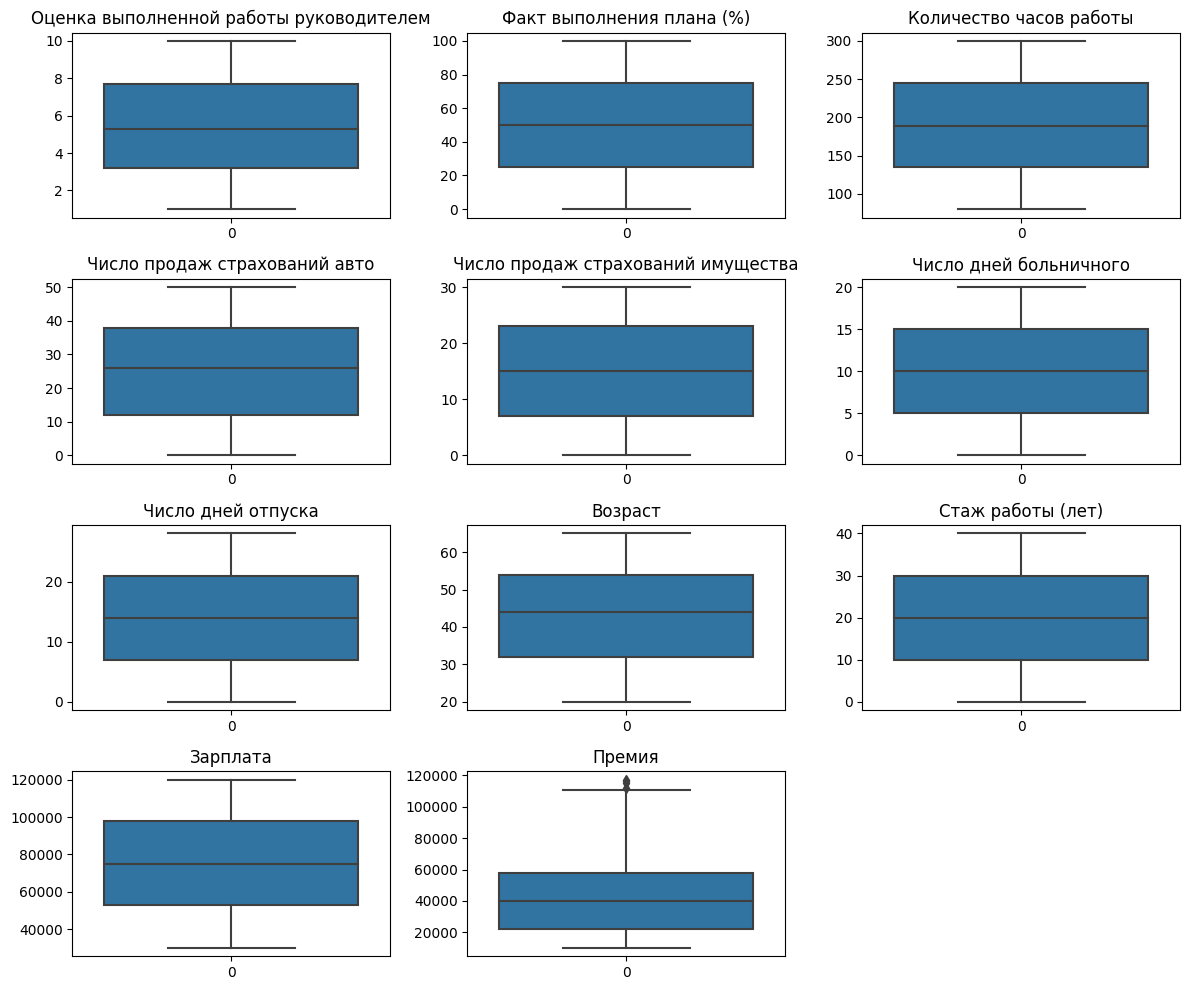

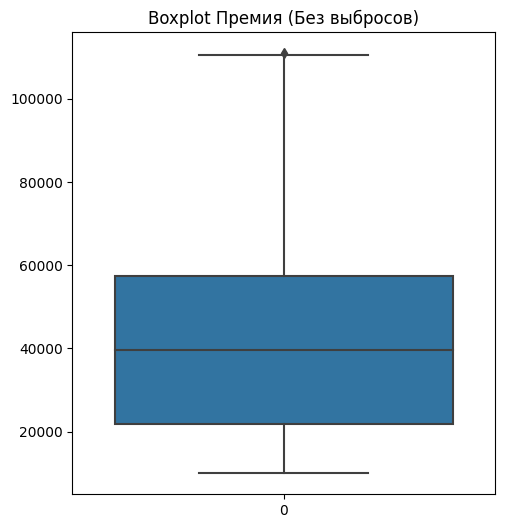

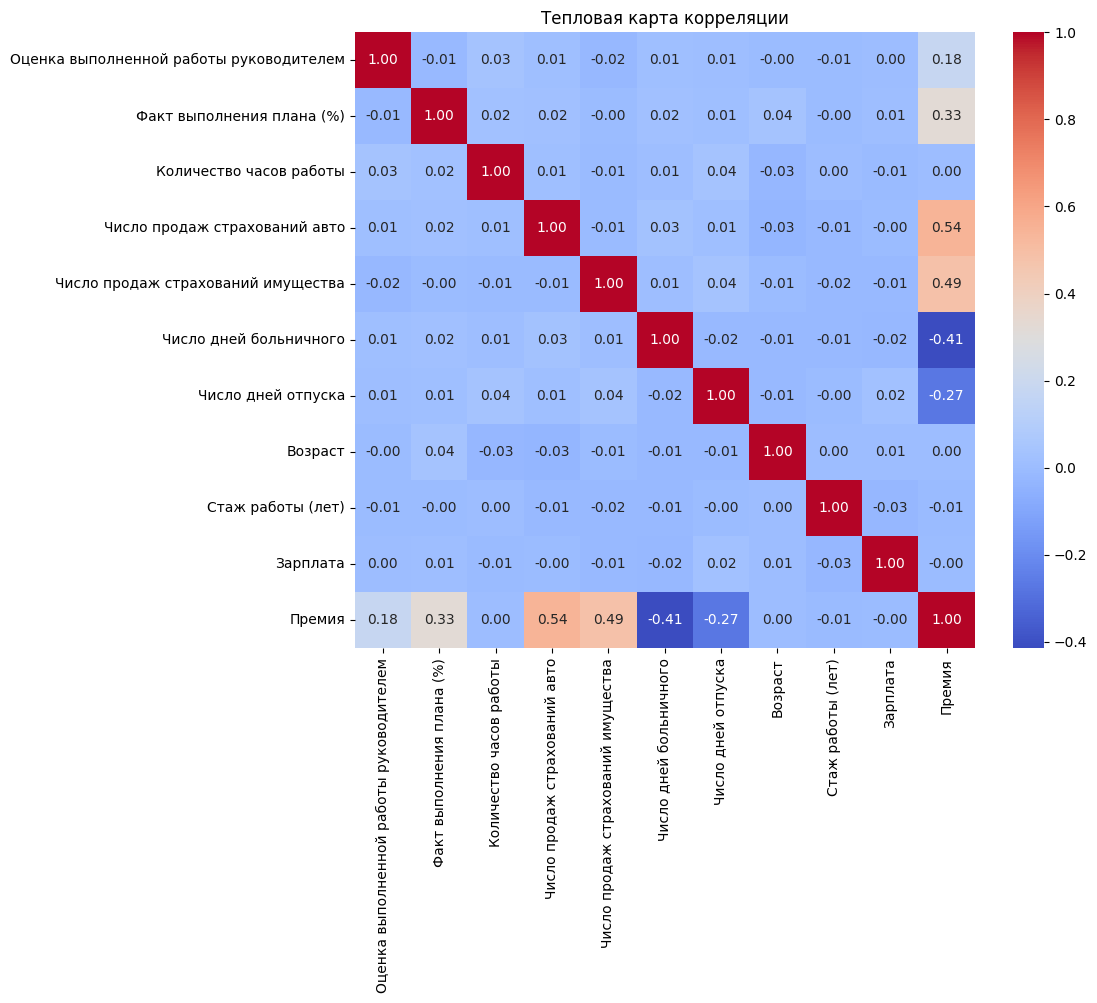

Значимые признаки с корреляцией >= 0.15 с 'Премия':
['Оценка выполненной работы руководителем', 'Факт выполнения плана (%)', 'Число продаж страхований авто', 'Число продаж страхований имущества', 'Число дней больничного', 'Число дней отпуска', 'Премия']


In [45]:
# 1. Загрузка данных
df = pd.read_csv('employee_bonus_data_new.csv')

# 2. Проверка на пропущенные значения
print("Пропущенные значения по столбцам:")
print(df.isnull().sum())

print(df.describe())

# 5. Визуализация распределений числовых столбцов для идентификации выбросов
numerical_cols = ['Оценка выполненной работы руководителем', 'Факт выполнения плана (%)', 
                  'Количество часов работы', 'Число продаж страхований авто', 
                  'Число продаж страхований имущества', 'Число дней больничного', 
                  'Число дней отпуска', 'Возраст', 'Стаж работы (лет)', 'Зарплата', 'Премия']

plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i+1)
    sns.boxplot(data=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# 6. Удаление выбросов в 'Премия' с использованием IQR
Q1 = df['Премия'].quantile(0.25)
Q3 = df['Премия'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Премия'] >= lower_bound) & (df['Премия'] <= upper_bound)]

# 7. Визуализация распределения 'Премия' после удаления выбросов
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(df['Премия'])
plt.title('Boxplot Премия (Без выбросов)')


# 8. Расчет корреляционной матрицы на очищенных данных
corr_matrix = df.corr()

# 9. Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Тепловая карта корреляции')
plt.show()


# 11. Выбор значимых признаков на основе корреляции с 'Премия'
threshold = 0.15
relevant_features = corr_matrix['Премия'][corr_matrix['Премия'].abs() >= threshold].index.tolist()
print("Значимые признаки с корреляцией >= 0.15 с 'Премия':")
print(relevant_features)

# 12. Создание очищенного датасета с выбранными признаками
df_cleaned = df[relevant_features]

# 13. Сохранение очищенного датасета
df_cleaned.to_csv('employee_bonus_data_cleaned.csv', index=False)

In [44]:
df_cleaned

,Оценка выполненной работы руководителем,Факт выполнения плана (%),Число продаж страхований авто,Число продаж страхований имущества,Число дней больничного,Число дней отпуска,Премия
0,8.3,73,42,15,20,28,35000.0
1,6.3,95,49,15,20,13,59600.0
2,4.0,89,50,2,6,4,71700.0
3,4.0,100,45,12,17,5,62000.0
4,3.0,84,40,10,6,18,56200.0
...,...,...,...,...,...,...,...
2995,3.9,70,49,13,2,0,93300.0
2996,4.7,34,19,24,15,20,24600.0
2997,9.3,52,29,11,10,9,50700.0
2998,2.0,59,10,0,5,3,18700.0
